In [2]:
!pip install pandas

Questions:
1. Average Revenue by Industry – How does the average revenue differ across various industries?
2. Industry Representation – Which industries are most and least represented on the list?
3. Geographic Trends – Are there any noticeable patterns based on location?
4. Industries with Highest Average Growth – Which industries show the highest average growth?
5. Companies with Increasing Employment – Which companies have experienced the largest growth in employment?
6. Revenue Growth with Decreasing Employment – Are there any cases where revenue growth occurs along with a decrease in employment?

import data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

source_folder = 'inc 5000'
print(os.listdir(source_folder))

df = pd.read_csv('C:\\Users\\wizab\\nauka Python Kajo\\inc 5000\\5000kopi.csv', sep=';')

print(df.head())

['.ipynb_checkpoints', '5000kopi.csv']
   rank               name state   revenue   growth_%  \
0     1           Freestar    AZ  36900000  36680,39%   
1     2        FreightWise    TN  33600000  30547,93%   
2     3  Cece's Veggie Co.    TX  24900000  23880,49%   
3     4           LadyBoss    NM  32400000  21849,89%   
4     5             Perpay    PA  22500000  18166,41%   

                       industry  workers  previous_workers workers_growth_%  \
0       Advertising & Marketing     40.0                 5             700%   
1    Logistics & Transportation     39.0                 8             388%   
2               Food & Beverage    190.0                10            1800%   
3  Consumer Products & Services     57.0                 2            2750%   
4                        Retail     25.0                 6             317%   

   founded  yrs_on_list         metro          city  
0     2015            1       Phoenix       Phoenix  
1     2015            1     Nashvil

In [5]:
# remove %
df['growth_%'] = df['growth_%'].str.replace('%', '').str.replace(',', '.').astype(float)
df['workers_growth_%'] = df['workers_growth_%'].str.replace('%', '').str.replace(',', '.').astype(int)

print(df[['growth_%', 'workers_growth_%']].head())

   growth_%  workers_growth_%
0  36680.39               700
1  30547.93               388
2  23880.49              1800
3  21849.89              2750
4  18166.41               317


In [7]:
print(df.head())

   rank               name state   revenue  growth_%  \
0     1           Freestar    AZ  36900000  36680.39   
1     2        FreightWise    TN  33600000  30547.93   
2     3  Cece's Veggie Co.    TX  24900000  23880.49   
3     4           LadyBoss    NM  32400000  21849.89   
4     5             Perpay    PA  22500000  18166.41   

                       industry  workers  previous_workers  workers_growth_%  \
0       Advertising & Marketing     40.0                 5               700   
1    Logistics & Transportation     39.0                 8               388   
2               Food & Beverage    190.0                10              1800   
3  Consumer Products & Services     57.0                 2              2750   
4                        Retail     25.0                 6               317   

   founded  yrs_on_list         metro          city  
0     2015            1       Phoenix       Phoenix  
1     2015            1     Nashville     Brentwood  
2     2015          

Q1  Average Revenue by Industry

In [9]:
avg_rev_industry = df.groupby('industry')['revenue'].mean()
sorted_avg_rev_industry = avg_rev_industry.sort_values(ascending=False)

print("Average Revenue by Industry")
print(sorted_avg_rev_industry.apply(lambda x: f"{x:,.0f}"))

Average Revenue by Industry
industry
Security                        123,747,761
Health                          109,330,056
Logistics & Transportation      101,293,011
Energy                           80,221,795
Human Resources                  73,582,166
Consumer Products & Services     72,073,651
Retail                           66,552,761
Government Services              59,391,949
Insurance                        58,742,857
Construction                     58,422,571
Telecommunications               41,825,316
Financial Services               40,004,184
Food & Beverage                  39,855,906
Real Estate                      34,061,111
Manufacturing                    33,303,315
Engineering                      32,954,321
Computer Hardware                31,178,125
Business Products & Services     28,601,829
Travel & Hospitality             26,736,842
IT Management                    22,577,536
Environmental Services           22,506,977
Software                         21,573

Q2 Industry Representation – Which industries are most and least represented on the list?

In [11]:
industry_count = df['industry'].value_counts()
sorted_industry_count = industry_count.sort_values(ascending=False)
print("Industry Representation:")
print(sorted_industry_count)

Industry Representation:
industry
Business Products & Services    492
Advertising & Marketing         489
Software                        461
Health                          356
Construction                    350
Consumer Products & Services    315
IT Management                   276
Financial Services              239
Government Services             236
Real Estate                     198
Logistics & Transportation      186
Manufacturing                   181
Retail                          163
Human Resources                 157
Food & Beverage                 127
IT System Development           120
Engineering                      81
Telecommunications               79
Energy                           78
Insurance                        70
Education                        70
Security                         67
Travel & Hospitality             57
Media                            46
Environmental Services           43
IT Services                      43
Computer Hardware             

Trying to add a header. I don't know how to remove index

In [13]:
industry_count = df['industry'].value_counts()
sorted_industry_count_headers = industry_count.reset_index()

# Nadawanie odpowiednich nazw kolumnom
sorted_industry_count_headers.columns = ['Industry', 'Count']

# Wyświetlanie wyników
print("Industry Representation:")
print(sorted_industry_count_headers)

Industry Representation:
                        Industry  Count
0   Business Products & Services    492
1        Advertising & Marketing    489
2                       Software    461
3                         Health    356
4                   Construction    350
5   Consumer Products & Services    315
6                  IT Management    276
7             Financial Services    239
8            Government Services    236
9                    Real Estate    198
10    Logistics & Transportation    186
11                 Manufacturing    181
12                        Retail    163
13               Human Resources    157
14               Food & Beverage    127
15         IT System Development    120
16                   Engineering     81
17            Telecommunications     79
18                        Energy     78
19                     Insurance     70
20                     Education     70
21                      Security     67
22          Travel & Hospitality     57
23             

Q3. Geographic Trends – Are there any noticeable patterns based on location?

Avg revenue by state

In [15]:
avg_revenue_by_state = df.groupby('state')['revenue'].mean().sort_values(ascending=False)
print("Average Revenue by State:")
print(avg_revenue_by_state)

Average Revenue by State:
state
MN    2.856333e+08
OH    7.951062e+07
KY    7.458824e+07
PA    6.402791e+07
OR    5.867797e+07
NC    5.664593e+07
UT    5.520244e+07
SD    5.400714e+07
CA    5.313666e+07
FL    5.141351e+07
NE    5.098889e+07
NJ    5.069609e+07
CT    4.679730e+07
KS    4.422593e+07
VA    4.402882e+07
IL    4.297552e+07
TX    4.288822e+07
GA    4.235662e+07
TN    4.094167e+07
MA    3.896391e+07
MI    3.754268e+07
AL    3.710938e+07
IN    3.447460e+07
MO    3.376400e+07
DE    3.096364e+07
CO    2.924615e+07
NM    2.877143e+07
WA    2.785545e+07
MD    2.770769e+07
NY    2.769333e+07
SC    2.600357e+07
WI    2.571837e+07
OK    2.496429e+07
WV    2.491429e+07
ID    2.487619e+07
AZ    2.313654e+07
NH    2.278500e+07
NV    2.010303e+07
LA    2.001081e+07
IA    1.985806e+07
DC    1.900000e+07
ND    1.505000e+07
ME    1.417273e+07
HI    1.300000e+07
AR    1.138000e+07
WY    6.666667e+06
RI    6.620000e+06
VT    6.480000e+06
MT    6.418182e+06
MS    6.075000e+06
PR    5.350000e+06

Company count by state

In [17]:
company_count_by_state = df.groupby('state')['name'].count().sort_values(ascending=False)
print(company_count_by_state)

state
CA    712
TX    467
FL    385
NY    300
VA    288
IL    241
GA    219
PA    172
OH    160
CO    156
NC    135
MA    133
MD    130
NJ    128
UT    123
AZ    104
WA    101
TN     84
MI     82
MN     81
MO     75
AL     64
IN     63
OR     59
SC     56
WI     49
DC     43
LA     37
CT     37
KY     34
NV     33
IA     31
OK     28
NE     27
KS     27
ID     21
NH     20
SD     14
MT     11
ME     11
DE     11
ND     10
AR     10
NM      7
WV      7
WY      6
RI      5
VT      5
MS      4
HI      4
PR      2
Name: name, dtype: int64


Industries with Highest Average Growth – Which industries show the highest average growth?

In [19]:
avg_growth_industry = df.groupby('industry')['growth_%'].mean().round(2).sort_values(ascending=False)

print("Industries with Highest Average Growth in %")
print(avg_growth_industry)

Industries with Highest Average Growth in %
industry
Logistics & Transportation      717.56
Consumer Products & Services    685.64
Food & Beverage                 668.23
Computer Hardware               651.98
Energy                          592.08
Retail                          584.82
Health                          546.91
Software                        524.67
Telecommunications              515.41
Security                        490.19
Advertising & Marketing         486.69
Government Services             485.31
Environmental Services          458.56
Financial Services              423.94
Real Estate                     417.55
Media                           413.73
IT System Development           385.91
Education                       384.56
Construction                    358.09
Travel & Hospitality            346.42
Manufacturing                   333.70
Business Products & Services    313.47
Insurance                       306.15
Human Resources                 288.71
IT Manageme

Companies with Increasing Employment – Which have experienced growth in revenue

In [21]:
avg_workers_growth_company = df.groupby('name')['workers_growth_%'].mean().round(0)
avg_revenue_growth_company = df.groupby('name')['growth_%'].mean().round(2)

result1 = pd.DataFrame({
    'Average Workers Growth (%)': avg_workers_growth_company,
    'Average Revenue Growth (%)': avg_revenue_growth_company
}).reset_index()

result1 = result1.sort_values(by='Average Workers Growth (%)', ascending=False)

print("Companies with Increasing Employment and Revenue:")
print(result1)

Companies with Increasing Employment and Revenue:
                                       name  Average Workers Growth (%)  \
3029         Odyssey Logistics & Technology                    239900.0   
3886                         SkillSet Group                     14700.0   
273                 Alpha Omega Integration                     14400.0   
2882            Nationwide Mortgage Bankers                      9900.0   
155                                  Ad Hoc                      9850.0   
...                                     ...                         ...   
2632                                Mansari                      -100.0   
1884              Green Mountain Technology                      -100.0   
4426                            Tier4 Group                      -100.0   
4151               Synapse Business Systems                      -100.0   
2055  IDS International Government Services                      -100.0   

      Average Revenue Growth (%)  
3029          

Revenue Growth with Decreasing Employment – Are there any cases where revenue growth occurs along with a decrease in employment?

In [119]:
decrease_employment_revenue_growth = df[(df['growth_%'] > 0) & (df['workers_growth_%'] < 0)]
decrease_employment_revenue_growth = decrease_employment_revenue_growth.sort_values(by='workers_growth_%', ascending=True)

print("Revenue Growth with Decreasing Employment")
print(decrease_employment_revenue_growth[['name', 'revenue', 'workers', 'growth_%', 'workers_growth_%']])

Revenue Growth with Decreasing Employment
                                       name    revenue  workers  growth_%  \
245                             Tier4 Group    4600000      0.0   1729.40   
4942              Green Mountain Technology   21600000      0.0     54.20   
3755                                Mansari    2500000      NaN     90.75   
1973               Synapse Business Systems    3000000      0.0    204.09   
4567  IDS International Government Services   44700000      0.0     64.04   
...                                     ...        ...      ...       ...   
2759           Touchstone Merchandise Group   44300000     87.0    138.42   
3665                        CMBA Architects   14700000     53.0     95.21   
3799                          Cuddle Clones    3500000     50.0     88.46   
4258                      SBS CyberSecurity   10100000     71.0     72.55   
4367               Republic Bank of Chicago  109500000    281.0     69.39   

      workers_growth_%  
245     

Top 10 Revenue Growth with Decreasing Employment

In [121]:
decrease_employment_revenue_growth2 = df[(df['growth_%'] > 0) & (df['workers_growth_%'] < 0)]

top_10 = decrease_employment_revenue_growth2.sort_values(by='workers_growth_%', ascending=True).head(10)

print("Revenue Growth with Decreasing Employment")
print(top_10[['name', 'revenue', 'workers', 'growth_%', 'workers_growth_%']])

Revenue Growth with Decreasing Employment
                                       name    revenue  workers  growth_%  \
245                             Tier4 Group    4600000      0.0   1729.40   
4942              Green Mountain Technology   21600000      0.0     54.20   
3755                                Mansari    2500000      NaN     90.75   
1973               Synapse Business Systems    3000000      0.0    204.09   
4567  IDS International Government Services   44700000      0.0     64.04   
2629                           HydroFloTech    4000000      4.0    148.46   
475                  Powerful Professionals    2000000      5.0    935.03   
4270                     Integrity Services   19300000    100.0     72.24   
534                                   Peaxy    2900000     20.0    817.26   
2715                                   NCWC  195800000     54.0    142.26   

      workers_growth_%  
245               -100  
4942              -100  
3755              -100  
1973      

Visualizations

Seaborn

Q1 Average Revenue by Industry – How does the average revenue differ across various industries?

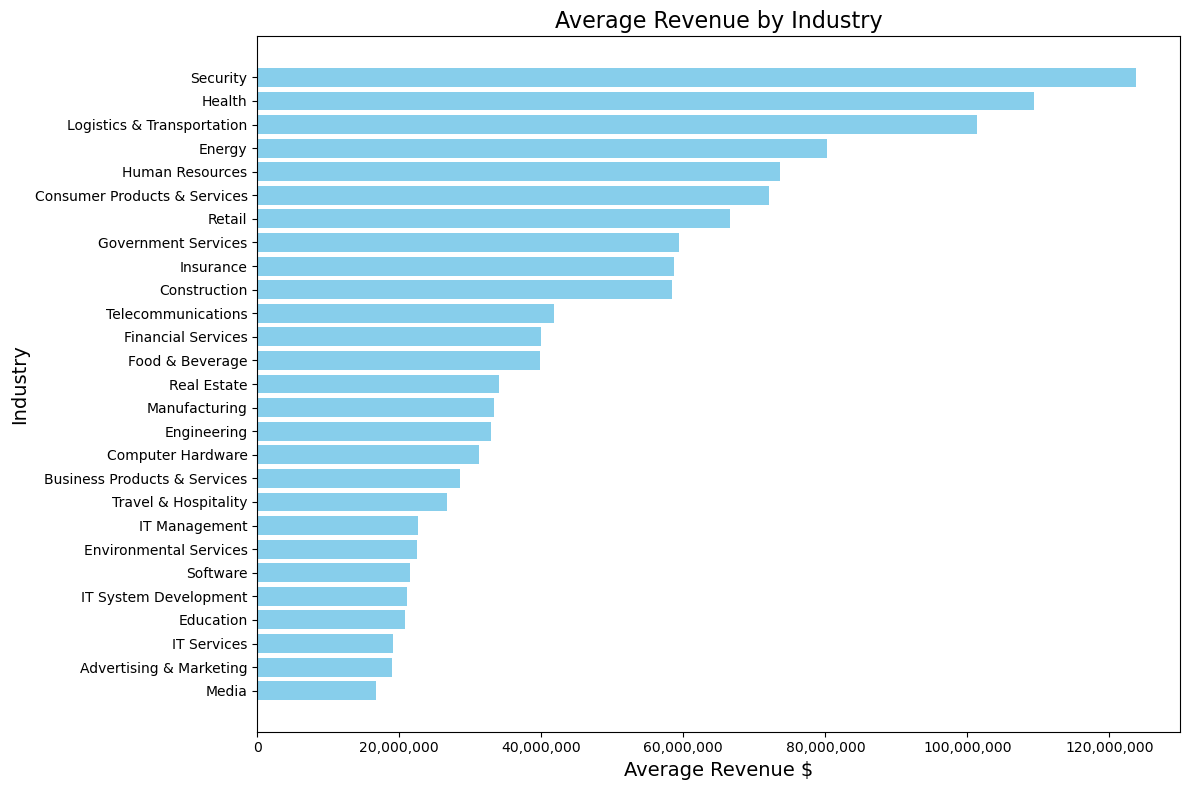

In [49]:
revenue_df = sorted_avg_rev_industry.reset_index()
revenue_df.columns = ['Industry', 'Average Revenue'] 

revenue_df = revenue_df.sort_values(by='Average Revenue', ascending=True)
plt.figure(figsize=(12, 8))

plt.barh(revenue_df['Industry'], revenue_df['Average Revenue'], color='skyblue')

plt.title('Average Revenue by Industry', fontsize=16)
plt.xlabel('Average Revenue $', fontsize=14)
plt.ylabel('Industry', fontsize=14)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.tight_layout()
plt.show()

Q2 Industry Representation – Which industries are most and least represented on the list?

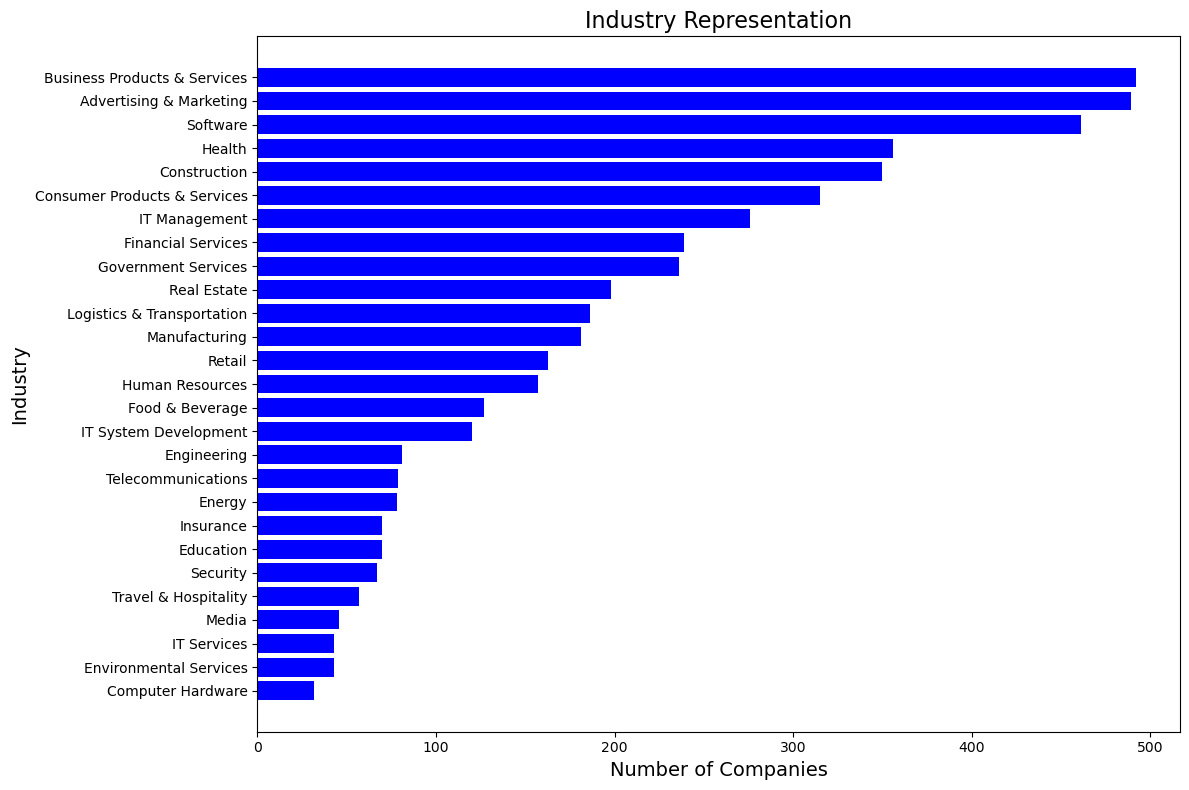

In [66]:
industry_count = df['industry'].value_counts()

industry_df.columns = ['Industry', 'Number of Companies'] 

industry_df = industry_df.sort_values(by='Number of Companies', ascending=True)

plt.figure(figsize=(12, 8))
plt.barh(industry_df['Industry'], industry_df['Number of Companies'], color='blue')

plt.title('Industry Representation', fontsize=16)
plt.xlabel('Number of Companies', fontsize=14)
plt.ylabel('Industry', fontsize=14)

plt.tight_layout() 
plt.show()

Geographic Trends – Are there any noticeable patterns based on location?

Avg revenue by State

C:\Users\wizab\AppData\Local\Temp\ipykernel_35208\3734981299.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Revenue', y='State', data=avg_revenue_df, palette='Blues')


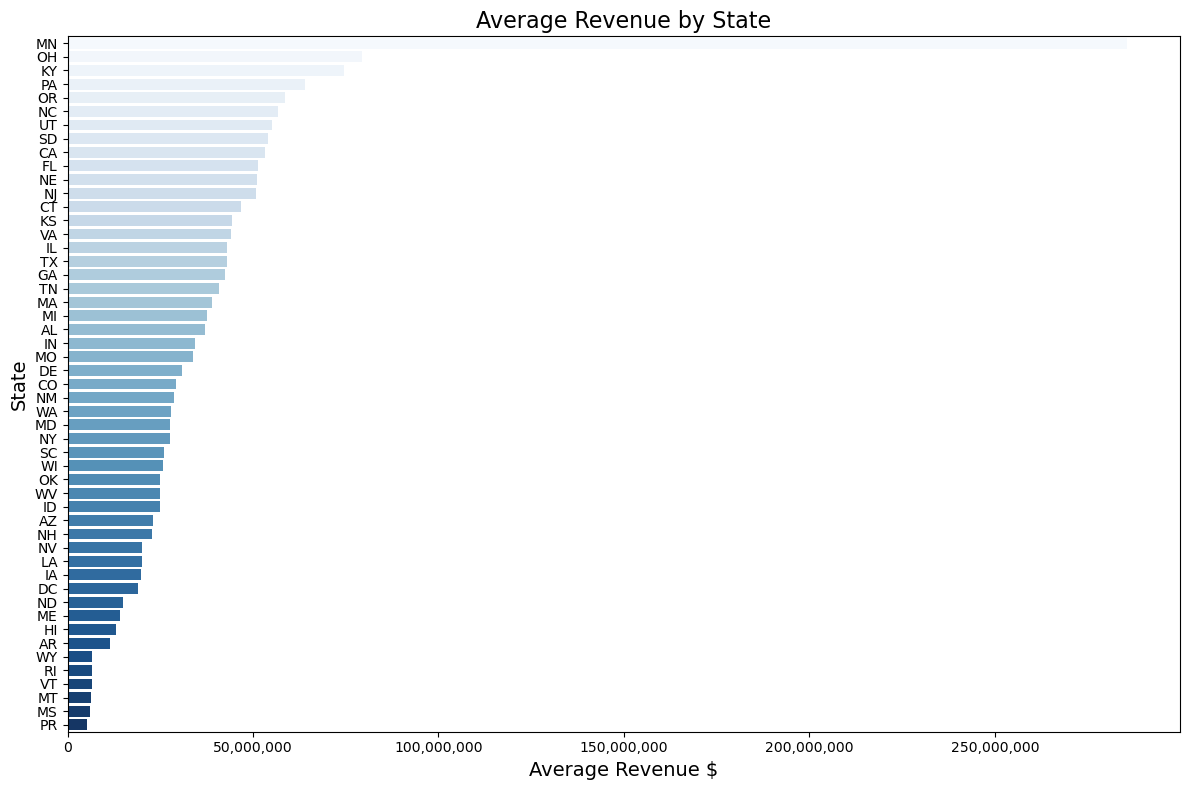

In [78]:
avg_revenue_df = avg_revenue_by_state.reset_index()
avg_revenue_df.columns = ['State', 'Average Revenue']

avg_revenue_df = avg_revenue_df.sort_values(by='Average Revenue', ascending=False)

plt.figure(figsize=(12, 8))

sns.barplot(x='Average Revenue', y='State', data=avg_revenue_df, palette='Blues')

plt.title('Average Revenue by State', fontsize=16)
plt.xlabel('Average Revenue $', fontsize=14)
plt.ylabel('State', fontsize=14)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.tight_layout() 
plt.show()

TOP 10 Companies which Decrease Employment and growth revenue

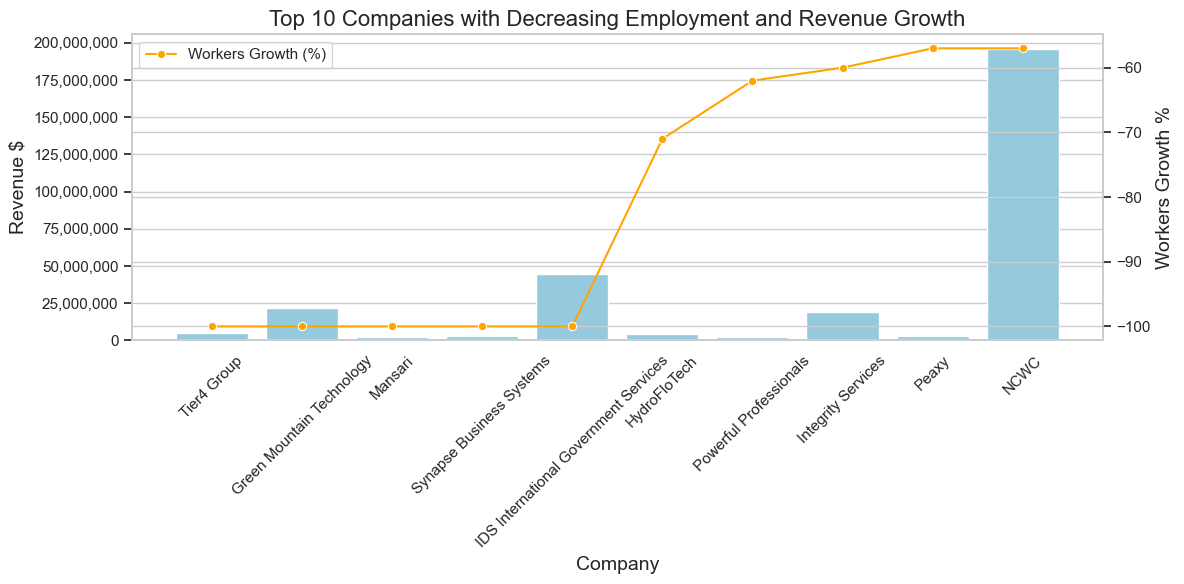

In [184]:
import matplotlib.ticker as ticker

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

sns.barplot(x='name', y='revenue', data=top_10, color='skyblue')

# Ustawienia etykiet
plt.title('Top 10 Companies with Decreasing Employment and Revenue Growth', fontsize=16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Revenue $', fontsize=14)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xticks(rotation=45)

ax2 = plt.gca().twinx()

sns.lineplot(x='name', y='workers_growth_%', data=top_10, marker='o', color='orange', ax=ax2, label='Workers Growth (%)')

ax2.set_ylabel('Workers Growth %', fontsize=14)

ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()
